In [25]:
import pandas as pd
import numpy as np
import seaborn as sn
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

### Similarity structure in Active set

In [26]:
active_set = pd.read_excel("Active_cleaned.xlsx")
active_set

Unnamed: 0       mw  xlogp  polararea  hbondacc  hbonddonor  rotbonds  \
0              0   383.50   -2.4      136.0         7           3         5   
1              1   378.50    3.5       83.8         5           2         4   
2              2   332.38   -3.1      127.0         6           3         2   
3              3   513.60    1.2      212.0        10           2         6   
4              4   503.60    2.4      151.0         8           4         1   
...          ...      ...    ...        ...       ...         ...       ...   
2316        2316   885.10    2.7      201.0        17           3        13   
2317        2317   478.60    0.4      212.0        10           3         7   
2318        2318   525.60   -2.4      251.0        13           3        10   
2319        2319  1155.40   -3.3      491.0        18          18        28   
2320        2320   765.90    5.4      163.0        12           2         8   

      heavycnt            mf  \
0           26   C17H25N3O5S   
1           27      C22H34O5   
2           22   C12H20N4O5S   
3           35  C21H19N7O5S2   
4           36    C26H37N3O7   
...        ...           ...   
2316        62   C45H76N2O15   
2317        31  C19H18N4O5S3   
2318        34  C18H23N9O4S3   
2319        81  C52H98N16O13   
2320        55   C42H59N3O10   

                                        canonicalsmiles  \
0     CC1C2C(C(=O)N2C(=C1SC3CC(NC3)C(=O)N(C)C)C(=O)O...   
1     CC1CCC23CCC(=O)C2C1(C(CC(C(C3C)O)(C)C=C)OC(=O)...   
2            C1CC(CCNC1)NC(=O)N2CCC3C2C(=O)N3S(=O)(=O)O   
3     CON=C(C1=CSC(=N1)N)C(=O)NC2C3N(C2=O)C(=C(CS3)C...   
4     CC1C=CC(=O)NCC=CC(=CC(CC(CC2=NC(=CO2)C(=O)NC(C...   
...                                                 ...   
2316  CC1CC=CC=CC(C(CC(C(C(C(CC(=O)O1)OC(=O)C)OC)OC2...   
2317  CC1=NN=C(S1)SCC2=C(N3C(C(C3=O)NC(=O)C(C4=CC=CC...   
2318  CN(C)CCN1C(=NN=N1)SCC2=C(N3C(C(C3=O)NC(=O)CC4=...   
2319  CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...   
2320  CCC1C2(C(C(C(=O)C(CC(C(C(C(=O)C(C(=O)O1)C)C)OC...   

                         inchikey Activity  
0     DMJNNHOOLUXYBV-PQTSNVLCSA-N   Active  
1     ZRZNJUXESFHSIO-BWQWJNJNSA-N   Active  
2     AWYIBQKIKNJPFA-BBBLOLIVSA-N   Active  
3     UQCYUTGIMQPJIS-URCGDANASA-N   Active  
4     SAQNYTQFLPVTNJ-YHZICBGDSA-N   Active  
...                           ...      ...  
2316  ZPCCSZFPOXBNDL-NOJGBCAOSA-N   Active  
2317  VDFFPBOAOLQAJV-SUYBPPKGSA-N   Active  
2318  QYQDKDWGWDOFFU-IUODEOHRSA-N   Active  
2319  YKQOSKADJPQZHB-QNPLFGSASA-N   Active  
2320  PENDGIOBPJLVBT-AMXFZXBBSA-N   Active  

[2321 rows x 12 columns]

In [27]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(active_set,'canonicalsmiles', 'Structure')

In [28]:
active_set.head()

Unnamed: 0      mw  xlogp  polararea  hbondacc  hbonddonor  rotbonds  \
0           0  383.50   -2.4      136.0         7           3         5   
1           1  378.50    3.5       83.8         5           2         4   
2           2  332.38   -3.1      127.0         6           3         2   
3           3  513.60    1.2      212.0        10           2         6   
4           4  503.60    2.4      151.0         8           4         1   

   heavycnt            mf                                    canonicalsmiles  \
0        26   C17H25N3O5S  CC1C2C(C(=O)N2C(=C1SC3CC(NC3)C(=O)N(C)C)C(=O)O...   
1        27      C22H34O5  CC1CCC23CCC(=O)C2C1(C(CC(C(C3C)O)(C)C=C)OC(=O)...   
2        22   C12H20N4O5S         C1CC(CCNC1)NC(=O)N2CCC3C2C(=O)N3S(=O)(=O)O   
3        35  C21H19N7O5S2  CON=C(C1=CSC(=N1)N)C(=O)NC2C3N(C2=O)C(=C(CS3)C...   
4        36    C26H37N3O7  CC1C=CC(=O)NCC=CC(=CC(CC(CC2=NC(=CO2)C(=O)NC(C...   

                      inchikey Activity  \
0  DMJNNHOOLUXYBV-PQTSNVLCSA-N   Active   
1  ZRZNJUXESFHSIO-BWQWJNJNSA-N   Active   
2  AWYIBQKIKNJPFA-BBBLOLIVSA-N   Active   
3  UQCYUTGIMQPJIS-URCGDANASA-N   Active   
4  SAQNYTQFLPVTNJ-YHZICBGDSA-N   Active   

                                           Structure  
0  <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...  
1  <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...  
2  <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...  
3  <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...  
4  <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...

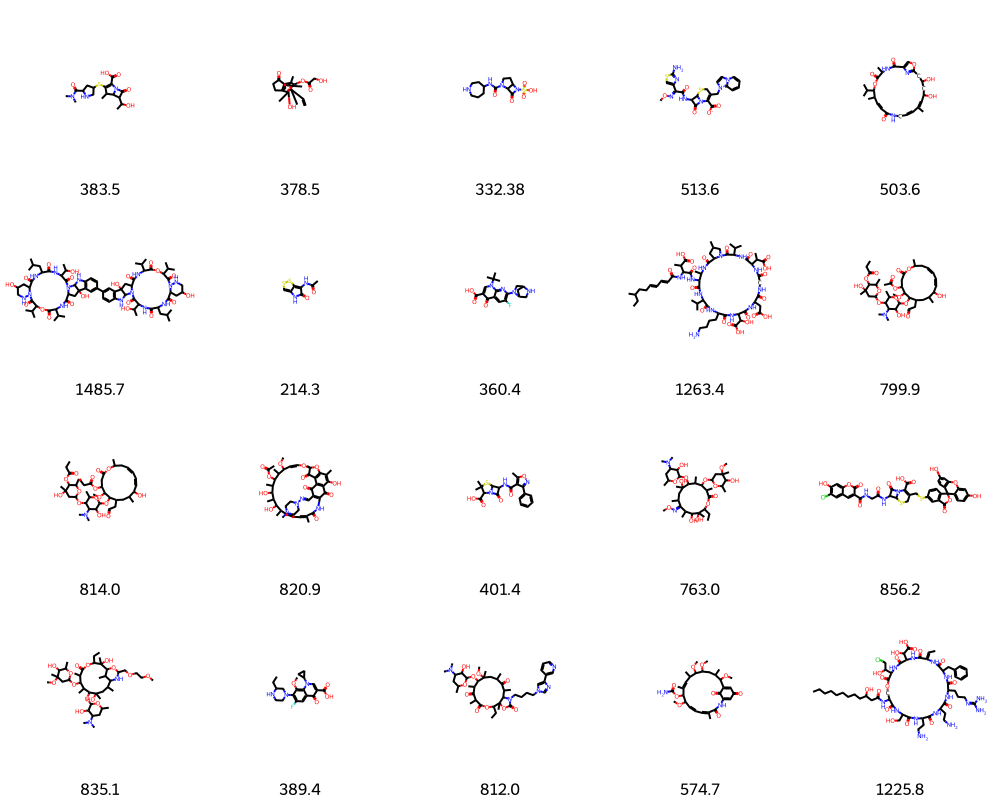

In [29]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in active_set["Structure"]][:20], maxMols=100, 
                     legends=[str(x) for x in active_set.mw], subImgSize=(200,200), molsPerRow=5)

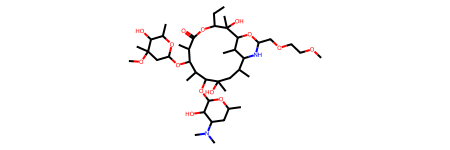

In [31]:
active_set.Structure[15]

In [21]:
# # Generate MACCS (Molecular ACCess System) keys
# from rdkit.Chem import MACCSkeys
# Mkeys = MACCSkeys.GenMACCSKeys(dataset.Structure[0])

# # Use numpy array to see On and Off bits
# print(np.array(Mkeys))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0]


In [32]:
# Calculate the fingerprints of all the compounds(total 2904)
all_Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096) for mol in active_set.Structure]

In [33]:
len(all_Mfpts)

2321

In [35]:
# Let us use 20 rows of the data to calculate Tanimoto coefficient in matrix form
dataset_matrix = active_set

In [36]:
# Big Credit for this website: https://www.macinchem.org/reviews/molsimilar/SimilarMyMolecules.html
# Modified their code to my data
# Calculate Morgan fingerprints and store them in a list
fpts_list = []

for mol in dataset_matrix['Structure']:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    fpts_list.append(fp)

# put the fingerprint list into the data frame
dataset_matrix['m_fpt2']= fpts_list

#----------------------------------------------
for ind in tqdm(dataset_matrix.index):
    fp1 = dataset_matrix.at[ind,'m_fpt2']
    col_name = dataset_matrix.at[ind,'Structure']
    simlist = []
    
    for mol in dataset_matrix.Structure:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        sim =DataStructs.TanimotoSimilarity(fp1, fp)
        simlist.append(sim)
    dataset_matrix[col_name] = simlist    

100%|██████████| 2321/2321 [48:40<00:00,  1.26s/it]  


#### Visualization

In [42]:
# drop some columns for better visualization
dataset_new = dataset_matrix.drop(['Unnamed: 0','mw','xlogp','polararea','hbondacc','hbonddonor','rotbonds','heavycnt','mf','canonicalsmiles','inchikey','Activity','m_fpt2'], axis=1)

# Display 10 rows and columns of the data frame
dataset_20 =  dataset_new.iloc[:100,:100]

# Big Credit for this website: https://www.macinchem.org/reviews/molsimilar/SimilarMyMolecules.html
# Highlight Tanimoto similarity scores with contextual coloring
color_map = sn.light_palette("orange", as_cmap=True)
gradient_color = dataset_20.style.background_gradient(cmap=color_map)
gradient_color

In [41]:
dataset_new

Structure  \
0     <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...   
1     <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...   
2     <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...   
3     <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...   
4     <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...   
...                                                 ...   
2316  <rdkit.Chem.rdchem.Mol object at 0x000001FEB79...   
2317  <rdkit.Chem.rdchem.Mol object at 0x000001FEB79...   
2318  <rdkit.Chem.rdchem.Mol object at 0x000001FEB79...   
2319  <rdkit.Chem.rdchem.Mol object at 0x000001FEB79...   
2320  <rdkit.Chem.rdchem.Mol object at 0x000001FEB79...   

      <rdkit.Chem.rdchem.Mol object at 0x000001FED6D1CF20>  \
0                                              1.000000      
1                                              0.096774      
2                                              0.130952      
3                                              0.102564      
4                                              0.113208      
...                                                 ...      
2316                                           0.114504      
2317                                           0.189474      
2318                                           0.169811      
2319                                           0.123894      
2320                                           0.106870      

      <rdkit.Chem.rdchem.Mol object at 0x000001FED6D1E270>  \
0                                              0.096774      
1                                              1.000000      
2                                              0.104651      
3                                              0.084034      
4                                              0.134615      
...                                                 ...      
2316                                           0.158730      
2317                                           0.097087      
2318                                           0.078261      
2319                                           0.085470      
2320                                           0.115385      

      <rdkit.Chem.rdchem.Mol object at 0x000001FED6D1E190>  \
0                                              0.130952      
1                                              0.104651      
2                                              1.000000      
3                                              0.099099      
4                                              0.099010      
...                                                 ...      
2316                                           0.069231      
2317                                           0.127660      
2318                                           0.103774      
2319                                           0.132075      
2320                                           0.061538      

      <rdkit.Chem.rdchem.Mol object at 0x000001FED6D1E430>  \
0                                              0.102564      
1                                              0.084034      
2                                              0.099099      
3                                              1.000000      
4                                              0.106870      
...                                                 ...      
2316                                           0.081250      
2317                                           0.308411      
2318                                           0.324561      
2319                                           0.107914      
2320                                           0.095541      

      <rdkit.Chem.rdchem.Mol object at 0x000001FED6D1E4A0>  \
0                                              0.113208      
1                                              0.134615      
2                                              0.099010      
3                                              0.106870      
4                                              

In [43]:
# https://pubs.acs.org/doi/pdf/10.1021/ci9803381?casa_token=VL8YLBlPerYAAAAA:5TeiBQCWe3SC020iL04q1ZUvlftWzCMm7fIShE4I2Q6OS5OQGVowA5mvOKU9Ana2nYzzuC5AHXDhp_gsMg
# https://github.com/rdkit/rdkit-orig/blob/master/rdkit/ML/Cluster/Butina.py
# https://www.macinchem.org/reviews/clustering/clustering.php
# Big credit to Pat Walters: https://github.com/PatWalters/workshop/blob/master/clustering/taylor_butina.ipynb
# I used his function with some modification

def TaylorButina_Cluster(fpts, distThresh = 0.3):
    # generate distance matrix:
    dist_matrix = []
    nfpts = len(fpts)
    for i in tqdm(range(1,nfpts)):
        
        # generate Tanimoto similary
        Tanimoto_coefficients = DataStructs.BulkTanimotoSimilarity(fpts[i],fpts[:i])
        dist_matrix.extend([1 - j for j in Tanimoto_coefficients])

    # cluster the Tanimoto scores using Butina:
    clusters = Butina.ClusterData(dist_matrix, nfpts, distThresh, isDistData=True)
    cluster_id_list = [0] * nfpts
    for idx,cluster in enumerate(clusters,1):
        for member in cluster:
            cluster_id_list[member] = idx
    return cluster_id_list    

In [44]:
cluster_id = TaylorButina_Cluster(all_Mfpts, distThresh=0.4)

100%|██████████| 2320/2320 [00:01<00:00, 1177.52it/s]


In [45]:
# Number of clusters
len(np.unique(cluster_id))

710

In [47]:
# Select some columns and add a cluster number column
dataset_cs = active_set[['canonicalsmiles','mw','Structure']]

# Put the cluster id to the data frame
dataset_cs['Cluster_number'] = cluster_id
dataset_cs.head()

canonicalsmiles      mw  \
0  CC1C2C(C(=O)N2C(=C1SC3CC(NC3)C(=O)N(C)C)C(=O)O...  383.50   
1  CC1CCC23CCC(=O)C2C1(C(CC(C(C3C)O)(C)C=C)OC(=O)...  378.50   
2         C1CC(CCNC1)NC(=O)N2CCC3C2C(=O)N3S(=O)(=O)O  332.38   
3  CON=C(C1=CSC(=N1)N)C(=O)NC2C3N(C2=O)C(=C(CS3)C...  513.60   
4  CC1C=CC(=O)NCC=CC(=CC(CC(CC2=NC(=CO2)C(=O)NC(C...  503.60   

                                           Structure  Cluster_number  
0  <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...              35  
1  <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...              22  
2  <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...             316  
3  <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...               2  
4  <rdkit.Chem.rdchem.Mol object at 0x000001FED6D...             146

In [48]:
# group_by cluster and count structure
dataset_cs.groupby('Cluster_number')['Structure'].count()

Cluster_number
1      138
2       96
3       73
4       63
5        1
      ... 
706      1
707      1
708      1
709      1
710      1
Name: Structure, Length: 710, dtype: int64

In [67]:
dataset_cs.tail()

canonicalsmiles      mw  \
2316  CC1CC=CC=CC(C(CC(C(C(C(CC(=O)O1)OC(=O)C)OC)OC2...   885.1   
2317  CC1=NN=C(S1)SCC2=C(N3C(C(C3=O)NC(=O)C(C4=CC=CC...   478.6   
2318  CN(C)CCN1C(=NN=N1)SCC2=C(N3C(C(C3=O)NC(=O)CC4=...   525.6   
2319  CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...  1155.4   
2320  CCC1C2(C(C(C(=O)C(CC(C(C(C(=O)C(C(=O)O1)C)C)OC...   765.9   

                                              Structure  Cluster_number  
2316  <rdkit.Chem.rdchem.Mol object at 0x000001FEB79...               3  
2317  <rdkit.Chem.rdchem.Mol object at 0x000001FEB79...              63  
2318  <rdkit.Chem.rdchem.Mol object at 0x000001FEB79...             228  
2319  <rdkit.Chem.rdchem.Mol object at 0x000001FEB79...              24  
2320  <rdkit.Chem.rdchem.Mol object at 0x000001FEB79...              66

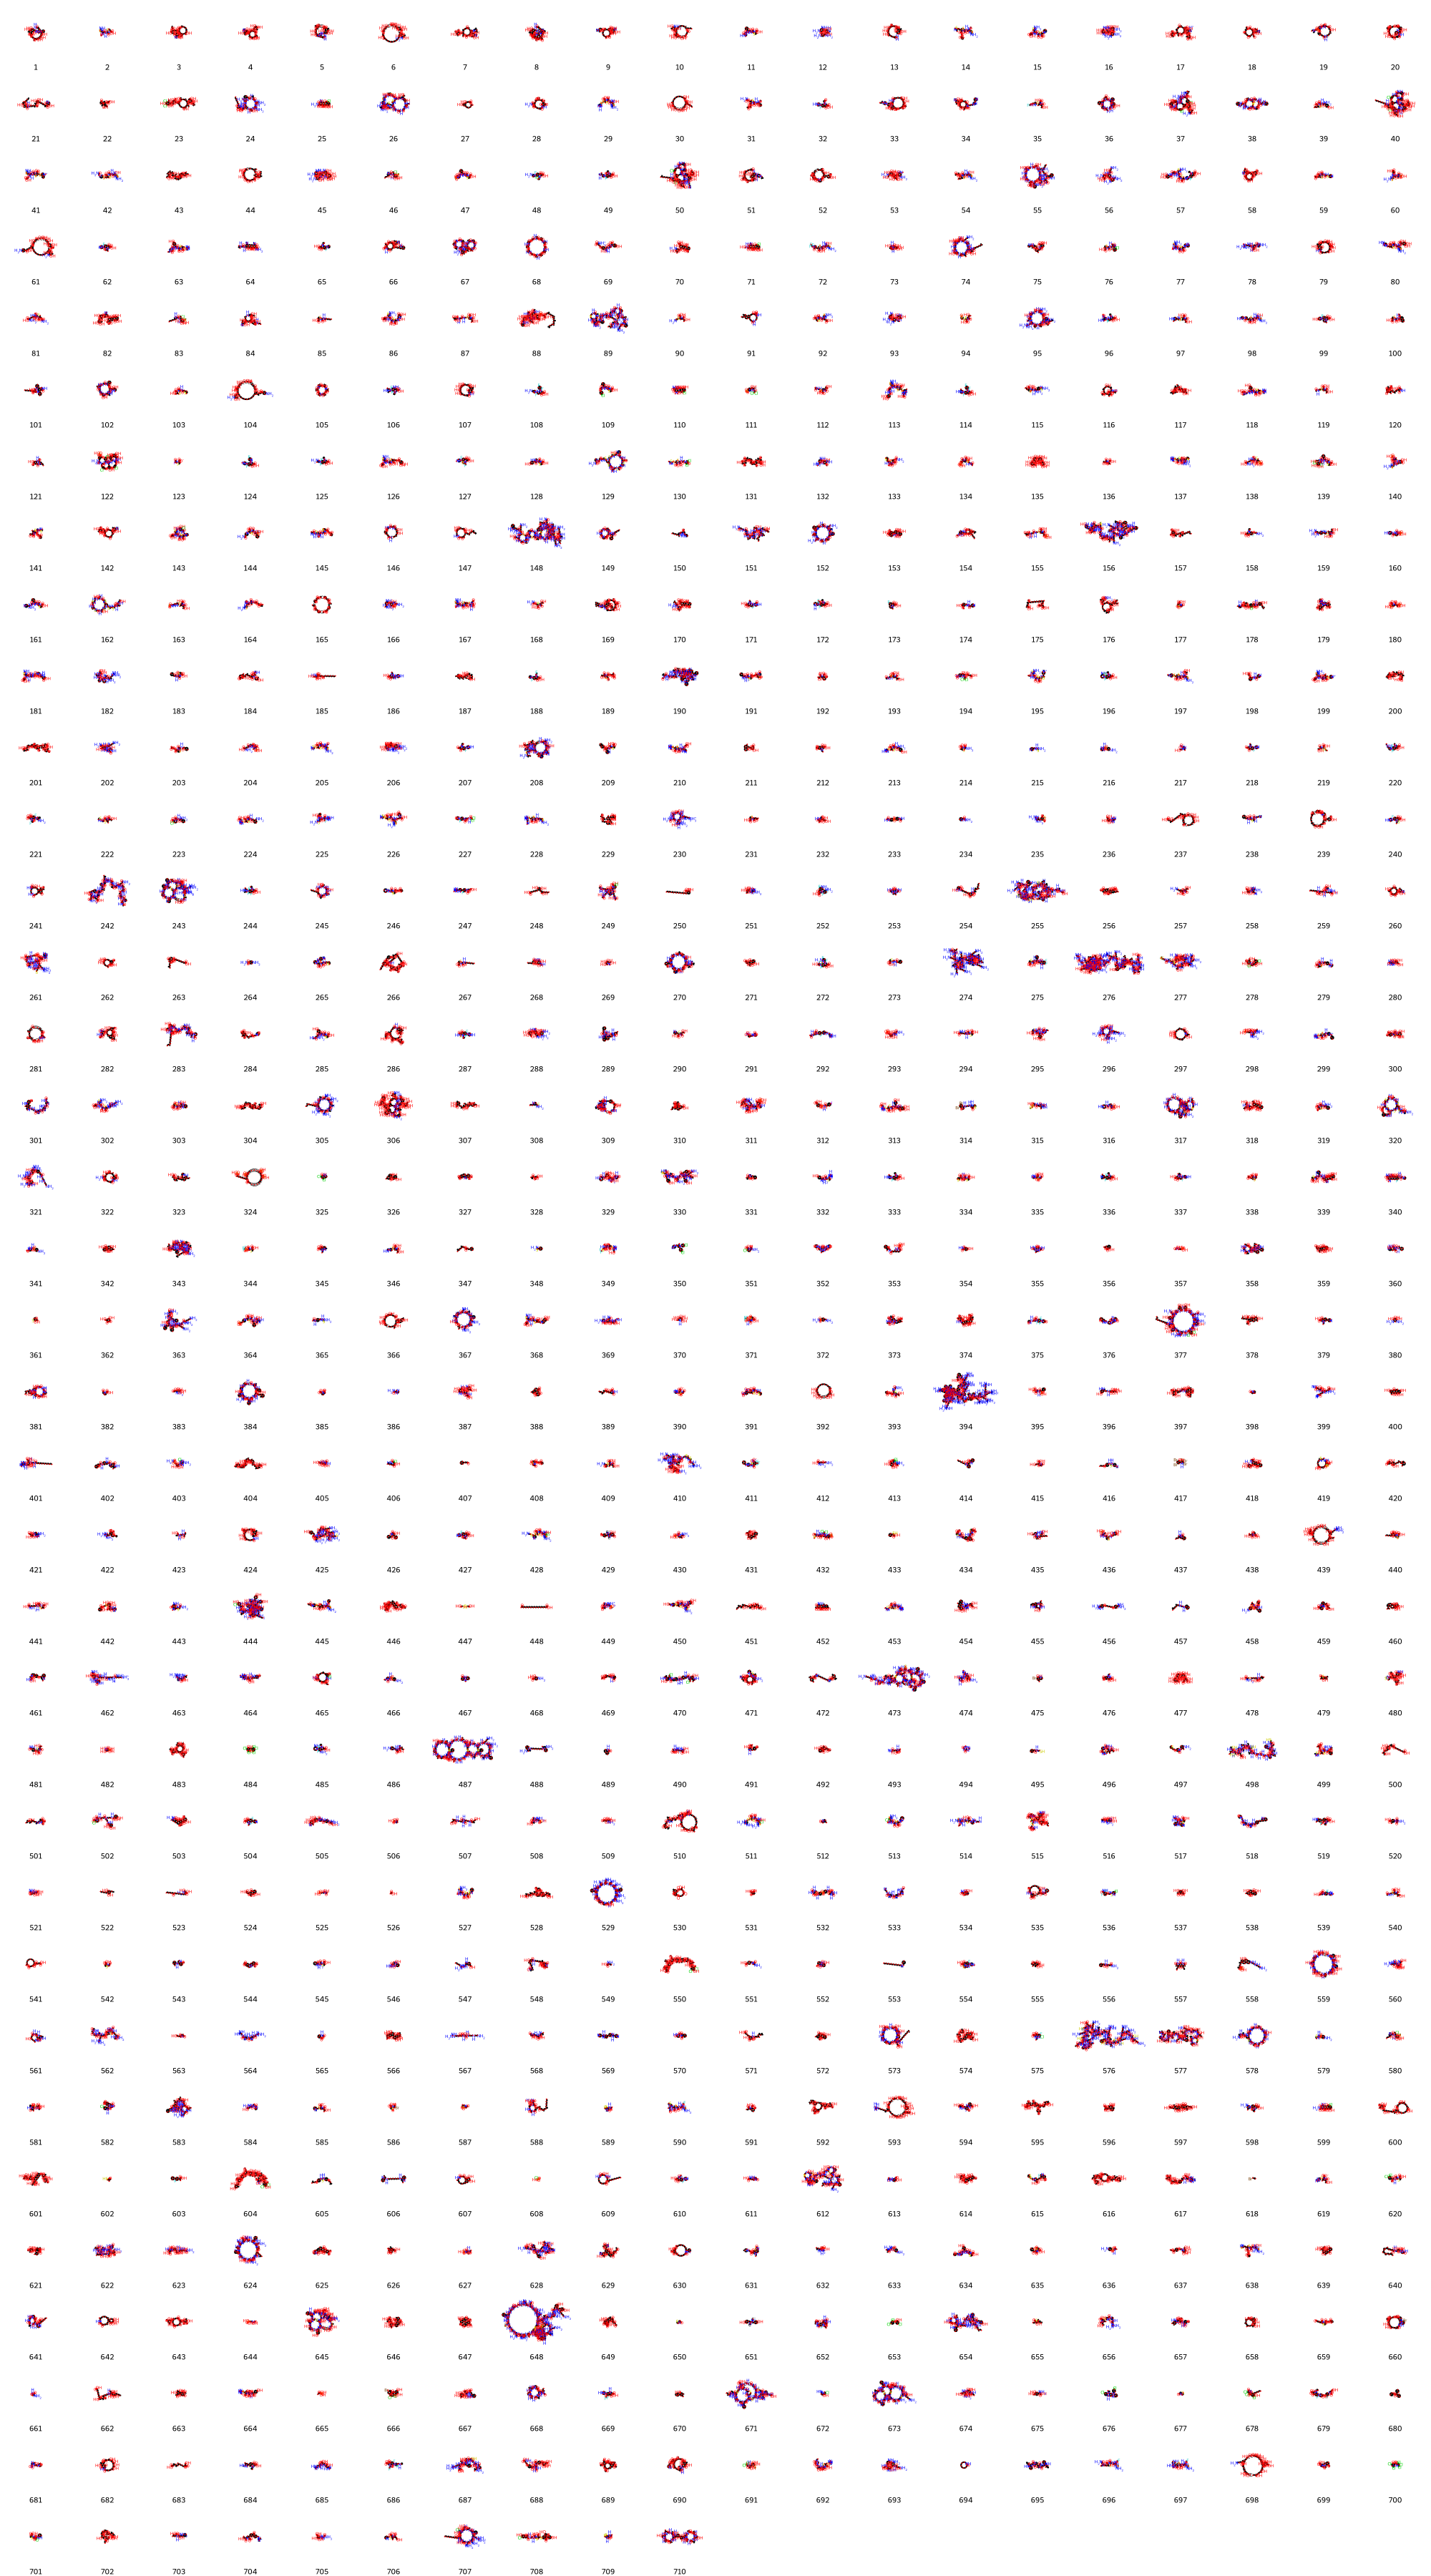

In [70]:
# Sort clusters
dataset_cs_sorted = dataset_cs.sort_values(["Cluster_number"], ascending=[True]).groupby('Cluster_number').first().reset_index()

# from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset_cs_sorted["Structure"]], maxMols=800, 
                     legends=[str(x) for x in dataset_cs_sorted.Cluster_number], subImgSize=(100,100), molsPerRow=20)

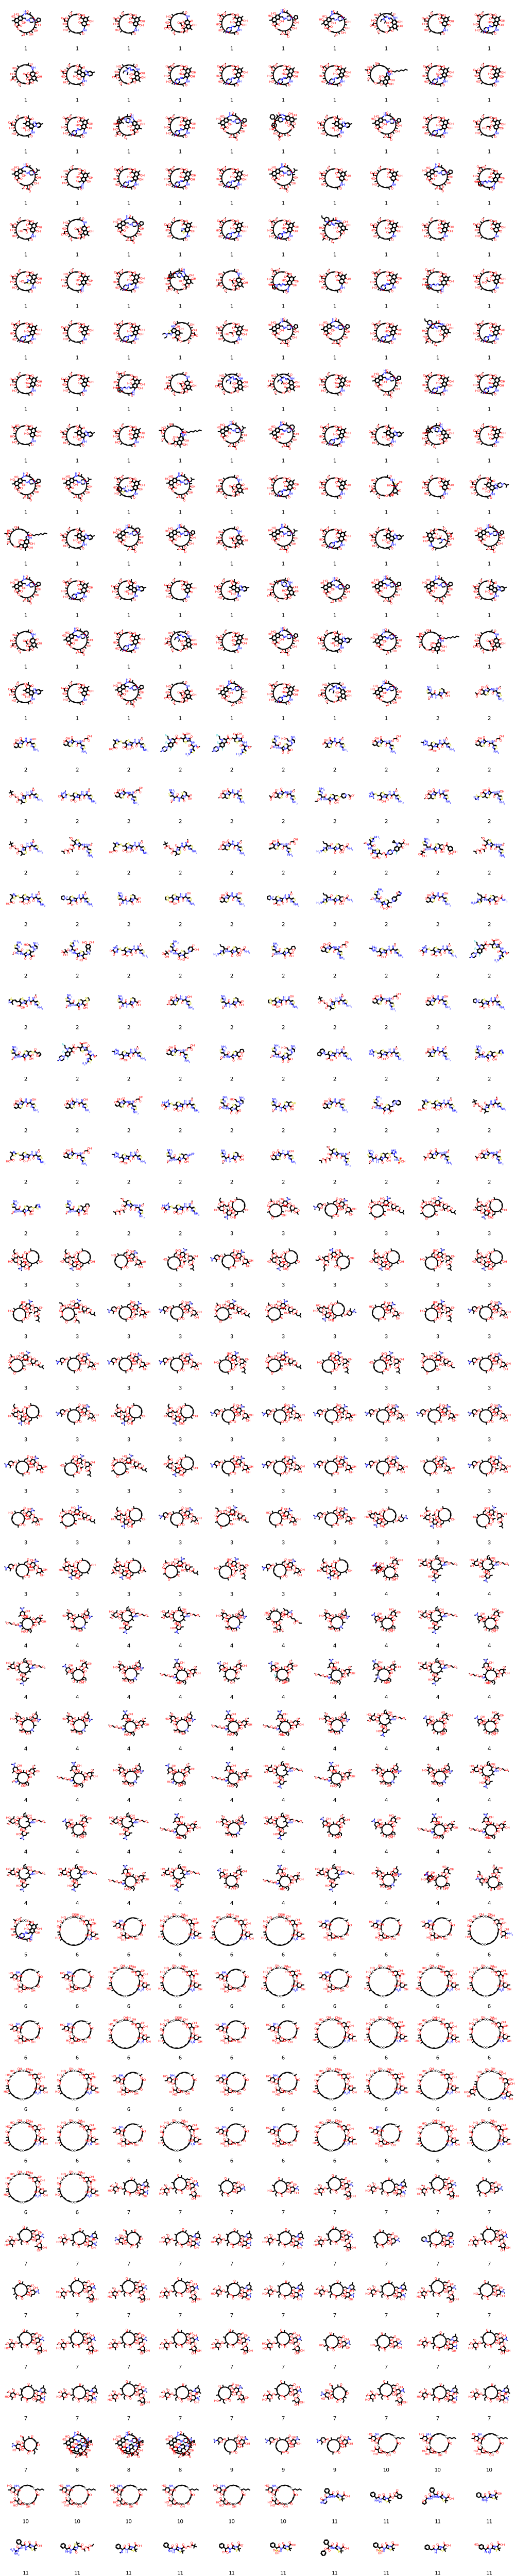

In [66]:
# Sort clusters
dataset_cs_sorted = dataset_cs.sort_values(["Cluster_number"], ascending=[True])

# from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset_cs_sorted["Structure"]], maxMols=500, 
                     legends=[str(x) for x in dataset_cs_sorted.Cluster_number], subImgSize=(100,100), molsPerRow=10)